# Advancing Rare-Earth Separation by Machine Learning


This is the code reproduce for paper:
Liu, T., Johnson, K.R., Jansone-Popova, S. and Jiang, D.E., 2022. Advancing Rare-Earth Separation by Machine Learning. JACS Au, 2(6), pp.1428-1434.


# Load dataset

In [1]:
# import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

print("tf version: ", tf.__version__)
print("keras version: ", keras.__version__)
print("np version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("pd version: ", pd.__version__)

tf version:  2.17.0
keras version:  3.4.1
np version:  1.26.4
matplotlib version:  3.8.0
pd version:  2.1.4


In [2]:
# Read the excel file
Training_Dataset = pd.read_excel("au2c00122_si_002.xlsx", sheet_name='training set')
Validation_Dataset = pd.read_excel("au2c00122_si_002.xlsx", sheet_name='validation set')

Validation_Dataset.head()

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K),log_D,reference
0,0,0,0,0,0,0,0,0,0,0,...,1341.1,2022.3,32.8,2.24,1.74,1.00,0.861,51.0,0.342423,1
1,0,0,0,0,0,0,0,0,0,0,...,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5,0.505150,1
2,0,0,0,0,0,0,0,0,0,0,...,1166.5,1990.5,13.2,2.34,1.82,1.20,0.938,67.9,0.230449,1
3,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,0.041393,1
4,0,0,0,0,0,0,0,0,0,0,...,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1,1.344392,2


# Data preparation

In [3]:
X_Train = Training_Dataset.iloc[:, 0:2291]
y_train = Training_Dataset.iloc[:, 2291]
X_Validation = Validation_Dataset.iloc[:, 0:2291]
y_Validation = Validation_Dataset.iloc[:, 2291]

X_Train.head()

,ECFP-1,ECFP-2,ECFP-3,ECFP-4,ECFP-5,ECFP-6,ECFP-7,ECFP-8,ECFP-9,ECFP-10,...,Density_metal (g/cm3),First IE_metal (kJ/mol),Second IE_metal (kJ/mol),Third IE_metal (kJ/mol),Electron Affinity_metal (kJ/mol),Atomic Radius_metal,Covalent Radius_metal,Pauling EN_metal,Ionic Radius_metal,Standard Entropy_metal (J/mol.K)
0,0,0,0,0,0,0,0,0,0,0,...,6.16,538.1,1067.0,1850.3,48.0,1.87,2.08,1.10,1.030,56.9
1,0,0,0,0,0,0,0,0,0,0,...,6.77,534.4,1046.9,1948.8,55.0,2.42,1.84,1.12,1.020,72.0
2,0,0,0,0,0,0,0,0,0,0,...,6.77,528.1,1017.9,2086.4,92.8,2.40,1.90,1.13,0.990,73.9
3,0,0,0,0,0,0,0,0,0,0,...,7.01,533.1,1034.3,2132.3,184.9,2.39,1.88,1.14,0.983,71.1
4,0,0,0,0,0,0,0,0,0,0,...,7.52,544.5,1068.1,2257.8,15.6,2.36,1.85,1.17,0.958,69.5


In [4]:
X_Train_arr = X_Train.to_numpy()
y_Train_arr = y_train.to_numpy()
X_Validation_arr = X_Validation.to_numpy()
y_Validation_arr = y_Validation.to_numpy()

print(X_Train_arr[0])
print(y_Train_arr[0])
print(y_Train_arr.shape)

[ 0.    0.    0.   ...  1.1   1.03 56.9 ]
0.477121255
(1085,)


# Build and train the model

In [7]:
# Build the model (sequential)

model = keras.models.Sequential()
model.add(keras.layers.Input([2291]))
model.add(keras.layers.Dense(512, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
model.add(keras.layers.Dense(16, activation="relu", kernel_initializer='normal', kernel_regularizer='l2'))
model.add(keras.layers.Dense(1, kernel_initializer='normal'))

In [8]:
# Compile the model

opt = keras.optimizers.SGD(learning_rate=0.00001)
model.compile(loss="mean_absolute_error", optimizer=opt, metrics=[keras.metrics.RootMeanSquaredError(), keras.metrics.R2Score()])

In [9]:
# Train the model

history = model.fit(X_Train_arr, y_Train_arr, epochs=5000, validation_data=[X_Validation_arr, y_Validation_arr])

Epoch 1/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 37.2936 - r2_score: -32.5612 - root_mean_squared_error: 7.6698 - val_loss: 32.4701 - val_r2_score: -0.6511 - val_root_mean_squared_error: 1.7517
Epoch 2/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.3138 - r2_score: -0.3298 - root_mean_squared_error: 1.5626 - val_loss: 32.1517 - val_r2_score: -0.0662 - val_root_mean_squared_error: 1.4077
Epoch 3/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32.1085 - r2_score: -0.1014 - root_mean_squared_error: 1.3790 - val_loss: 32.0999 - val_r2_score: -0.0051 - val_root_mean_squared_error: 1.3668
Epoch 4/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 32.1066 - r2_score: -0.0611 - root_mean_squared_error: 1.4000 - val_loss: 32.0752 - val_r2_score: 0.0301 - val_root_mean_squared_error: 1.3426
Epoch 5/5000
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32.1061 - r2_score: -0.0405 - root_mean_squared_error: 1.4119 - val_loss: 32.0572 - val_r2_score: 0.0581 - val_root_mean_sq

# Evaluate the model

In [10]:
# visualize the model structure with model.summary().

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,173,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           2,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,241,251 (4.74 MB)

 Trainable params: 1,241,249 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [13]:
# Evaluate trained model

results = model.evaluate(X_Train_arr, y_Train_arr, batch_size=128)
results = model.evaluate(X_Validation_arr, y_Validation_arr, batch_size=128)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29.4701 - r2_score: 0.6897 - root_mean_squared_error: 0.7336 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 29.6054 - r2_score: 0.5650 - root_mean_squared_error: 0.8991


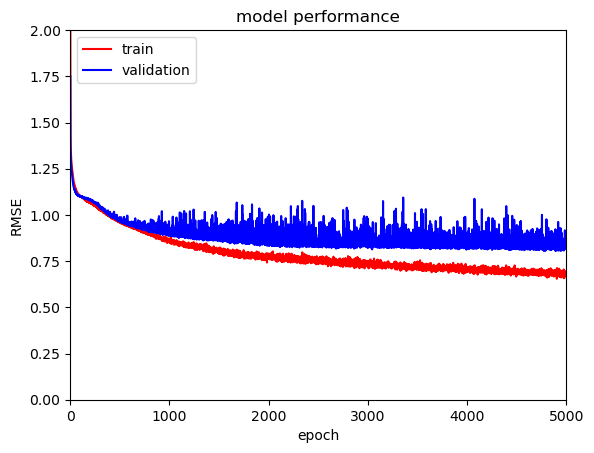

In [17]:
# plot performance vs epoch

plt.plot(history.history['root_mean_squared_error'],'r')
plt.plot(history.history['val_root_mean_squared_error'],'b')
plt.title('model performance')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0, 5000])
plt.ylim([0, 2])
plt.show()

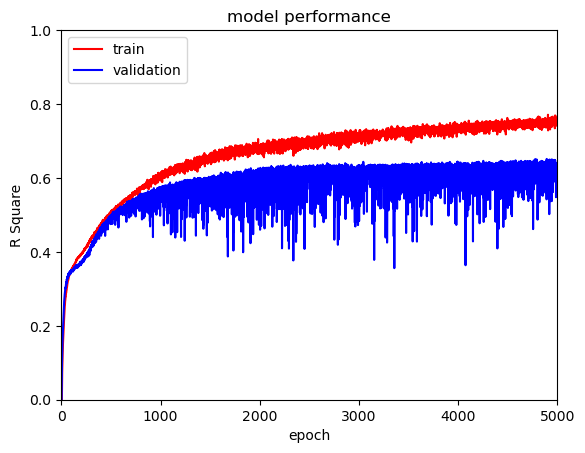

In [19]:
# plot performance vs epoch

plt.plot(history.history['r2_score'],'r')
plt.plot(history.history['val_r2_score'],'b')
plt.title('model performance')
plt.ylabel('R Square')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0, 5000])
plt.ylim([0, 1])
plt.show()

In [34]:
# Save the model

model_name = "trained_model.keras"
model.save(model_name)

# Inference

In [46]:
# Load the saved model

loaded_model = keras.models.load_model(model_name)

C:\Users\26070\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [50]:
# predict using the loaded model

y_pred_train = model.predict(X_Train_arr)
print(y_pred_train)

y_pred_val = model.predict(X_Validation_arr)
print(y_pred_val)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[ 0.23594233]
 [ 0.16526781]
 [ 0.19696476]
 ...
 [-0.18761532]
 [ 0.3916948 ]
 [-0.36486557]]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 3.80402446e-01]
 [ 3.49887431e-01]
 [-1.10711828e-02]
 [ 2.51246512e-01]
 [-1.18515086e+00]
 [-7.96880424e-01]
 [-1.87746847e+00]
 [-2.64845777e+00]
 [ 1.20021544e-01]
 [ 2.64989376e-01]
 [ 6.76520690e-02]
 [ 5.10550916e-01]
 [ 2.88544863e-01]
 [ 3.73775586e-02]
 [-1.91007897e-01]
 [-3.94751817e-01]
 [ 7.42672905e-02]
 [-1.73561260e-01]
 [-2.50286847e-01]
 [ 1.24890529e-01]
 [ 1.03788233e+00]
 [ 1.84584498e+00]
 [ 1.81876874e+00]
 [ 2.00108933e+00]
 [ 8.49087059e-01]
 [-5.52287757e-01]
 [-1.22008957e-01]
 [ 1.86130300e-01]
 [-1.20279230e-01]
 [-1.83411315e-01]
 [ 9.25666317e-02]
 [-1.67293978e+00]
 [-1.31434321e+00]
 [-2.00520062e+00]
 [-1.58750463e+00]
 [-8.13837349e-01]
 [-1.91545713e+00]
 [-2.33803511e+00]
 [-1.32083154e+00]
 [-2.27173805e+00]
 [-1.99118960e+00]
 [-2.04437566e+00]
 [ 1.00519496e-03]
 [ 6.29578